# Zadanie 1

## PBIL

In [65]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [66]:
def init_prob_vec(d):
    p = np.zeros(d)
    for k in range(d):
        p[k] = 0.5
    return p

In [67]:
def binary_random(p):
    if np.random.rand() < p:
        z = 1
    else:
        z = 0
    return z

In [68]:
def random_individual(p, d):
    x = np.zeros(d, dtype=int)
    for k in range(d):
        x[k] = binary_random(p[k])
    return x

In [69]:
def random_population(p, N, d):
    population = np.zeros((N, d))
    for k in range (N):
        population[k] = random_individual(p, d)
    return population

In [70]:
def population_evaluation(population, F, N):
    evaluation = np.zeros(N)
    for k in range(N):
        evaluation[k] = F(population[k])
    return evaluation

In [71]:
def best_individual(population, evaluation):
    max_idx = np.argmax(evaluation)
    return (population[max_idx], evaluation[max_idx])

d - chromosome length  
N - population size  
T - number of iterations  
theta1 - learning rate  
theta2 - probability of mutation  
theta3 - mutation disorder rate  
F - objective function  

In [116]:
def pbil(d, N, T, theta1, theta2, theta3, F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation(population, F, N)
    for t in range(T):
        best = best_individual(population, evaluation)
        x = best[0]
        results.append(best[1])
#         print(f'Best individual in iteration nr {t}: \t {x}')
        for k in range(d):
            p[k] = p[k] * (1 - theta1) + x[k] * theta1
        for k in range(d):
            if np.random.rand() < theta2:
                p[k] = p[k] * (1 - theta3) + binary_random(0.5) * theta3
        population = random_population(p, N, d)
        evaluation = population_evaluation(population, F, N)
    results.append(best[1])
    print(time.time() - t0, best[0])
    return results

## CGA

d - chromosome length </br>
theta - learning rate

In [312]:
def cga(d, T, theta, F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    x1 = random_individual(p, d)
    x2 = random_individual(p, d)
    x1_eval = F(x1)
    x2_eval = F(x2)
    for t in range(T):
        if x1_eval >= x2_eval:
            best = x1
            worst = x2
            results.append(x1_eval)
        else:
            best = x2
            worst = x1
            results.append(x2_eval)
#         print(f'Best individual in iteration nr {t}: \t {best}')
        for k in range(d):
            if best[k] == 1 and worst[k] == 0:
                p[k] = p[k] + theta
            if best[k] == 0 and worst[k] == 1:
                p[k] = p[k] - theta
        x1 = random_individual(p, d)
        x2 = random_individual(p, d)
        x1_eval = F(x1)
        x2_eval = F(x2)
    if x1_eval >= x2_eval:
        results.append(x1_eval)
        print(time.time() - t0, x1)
    else:
        results.append(x2_eval)
        print(time.time() - t0, x2)

    return results

## UMDA

In [74]:
def select(population, evaluation, M):
    selected = []
    indices = (-evaluation).argsort()[:M]
    for i in indices:
        selected.append(population[i])
    return selected

d - chromosome length </br>
N - population size </br>
M - sample size </br>
T - number of iterations </br>
F - objective function </br>

In [118]:
def umda(d, N, M, T ,F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation(population, F, N)
    best = best_individual(population, evaluation)
    results.append(best[1])
    for t in range(T):
        sample = select(population, evaluation, M)
        p = np.sum(sample, axis=0)
        p = [x / M for x in p]
        population = random_population(p, N, d)
        evaluation = population_evaluation(population, F, N)
        best = best_individual(population, evaluation)
        results.append(best[1])
    print(time.time() - t0, best[0])
    return results

## Results

In [82]:
def show_plt(results):
    plt.figure()
    plt.plot(results)
    plt.xlabel("iteration number")
    plt.ylabel("objective function value")
    plt.show()

### OneMax

In [83]:
def one_max(x):
    return np.sum(x)

#### PBIL

0.020949363708496094 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


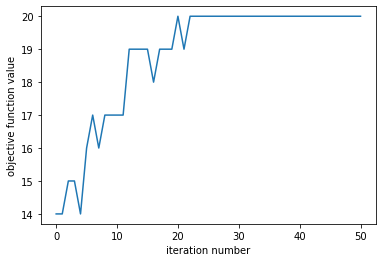

In [119]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.01, one_max)
show_plt(results)

#### CGA

0.002981424331665039 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


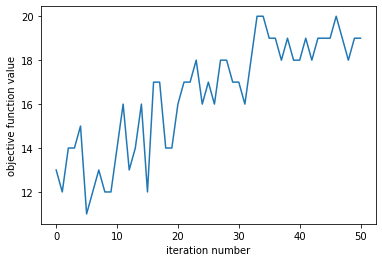

In [314]:
results = cga(20, 50, 0.1, one_max)
show_plt(results)

#### UMDA

0.01897597312927246 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


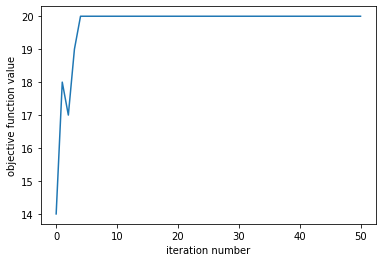

In [122]:
results = umda(20, 20, 5, 50, one_max)
show_plt(results)

### DeceptiveOneMax

In [ ]:
def deceptive_one_max(x):
    if np.count_nonzero(x) == 0:
        return len(x) + 1
    else:
        return np.sum(x)

#### PBIL

0.01994633674621582 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


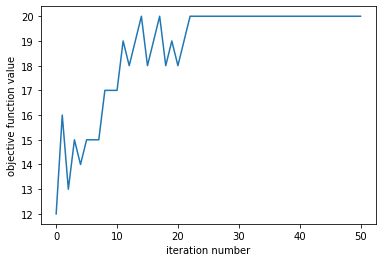

In [123]:
results = pbil(20, 20, 50, 0.1, 0.05, 0.01, deceptive_one_max)
show_plt(results)

#### CGA

0.0019941329956054688 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


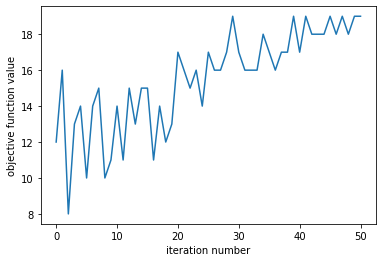

In [309]:
results = cga(20, 50, 0.1, deceptive_one_max)
show_plt(results)

#### UMDA

0.019971609115600586 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


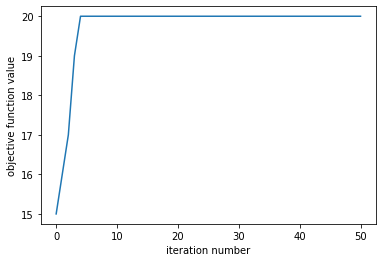

In [126]:
results = umda(20, 20, 5, 50, deceptive_one_max)
show_plt(results)

### K-DeceptiveOneMax

In [189]:
def k_deceptive_one_max(x, k):
    i = 0
    j = k
    res = 0
    for _ in range(0, len(x), k):
        res += deceptive_one_max(x[i:j])
        i += k
        j += k
    return res  

In [306]:
def population_evaluation_k(population, F, N, k):
    evaluation = np.zeros(N)
    for i in range(N):
        evaluation[i] = F(population[i], k)
    return evaluation

In [343]:
def pbil_k(d, N, T, theta1, theta2, theta3, F, k):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation_k(population, F, N, k)
    for t in range(T):
        best = best_individual(population, evaluation)
        x = best[0]
        results.append(best[1])
#         print(f'Best individual in iteration nr {t}: \t {best[0]}, {best[1]}')
        for i in range(d):
            p[i] = p[i] * (1 - theta1) + x[i] * theta1
        for i in range(d):
            if np.random.rand() < theta2:
                p[i] = p[i] * (1 - theta3) + binary_random(0.5) * theta3
        population = random_population(p, N, d)
        evaluation = population_evaluation_k(population, F, N, k)
    best = best_individual(population, evaluation)
    results.append(best[1])
    print(time.time() - t0, best[0])
    return results

In [344]:
def cga_k(d, T, theta, F, k):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    x1 = random_individual(p, d)
    x2 = random_individual(p, d)
    x1_eval = F(x1, k)
    x2_eval = F(x2, k)
    for t in range(T):
        if x1_eval >= x2_eval:
            best = x1
            worst = x2
            results.append(x1_eval)
        else:
            best = x2
            worst = x1
            results.append(x2_eval)
#         print(f'Best individual in iteration nr {t}: \t {best}')
        for i in range(d):
            if best[i] == 1 and worst[i] == 0:
                p[i] = p[i] + theta
            if best[i] == 0 and worst[i] == 1:
                p[i] = p[i] - theta
        x1 = random_individual(p, d)
        x2 = random_individual(p, d)
        x1_eval = F(x1, k)
        x2_eval = F(x2, k)
    if x1_eval >= x2_eval:
        results.append(x1_eval)
        print(time.time() - t0, x1)
    else:
        results.append(x2_eval)
        print(time.time() - t0, x2)
    return results

In [193]:
def umda_k(d, N, M, T , F, k):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation_k(population, F, N, k)
    best = best_individual(population, evaluation)
    results.append(best[1])
    for t in range(T):
        sample = select(population, evaluation, M)
        p = np.sum(sample, axis=0)
        p = [x / M for x in p]
        population = random_population(p, N, d)
        evaluation = population_evaluation_k(population, F, N, k)
        best = best_individual(population, evaluation)
        results.append(best[1])
    print(time.time() - t0, best[0])
    return results

#### PBIL

0.03291201591491699 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


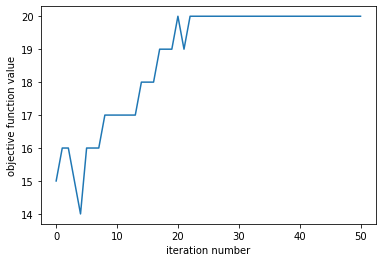

In [345]:
results = pbil_k(20, 20, 50, 0.1, 0.05, 0.01, k_deceptive_one_max, 7)
show_plt(results)

#### CGA

0.002989530563354492 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


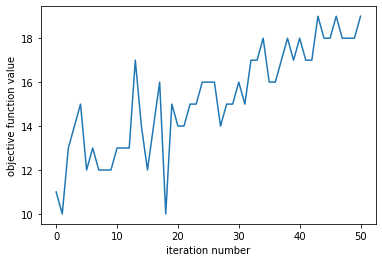

In [346]:
results = cga_k(20, 50, 0.1, k_deceptive_one_max, 7)
show_plt(results)

#### UMDA

0.02894902229309082 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


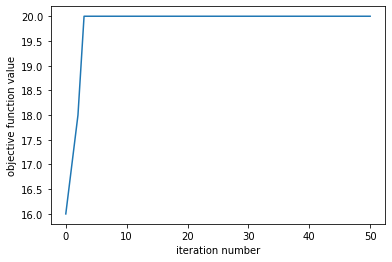

In [198]:
results = umda_k(20, 20, 5, 50, k_deceptive_one_max, 7)
show_plt(results)